## Facet shape extraction - test notebook

In [57]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [58]:
def read_XYZ(filepath):
    filepath = Path(filepath)
    xyz = None
    if filepath.suffix == ".xyz" or filepath.suffix == ".XYZ":
        xyz = np.genfromtxt(filepath, skip_header=2, usecols=(2,3,4,5))
        mask = [row[0] in [1, 2, 3, 4] for row in xyz]
        xyz = [list(row) for row, keep in zip(xyz, mask) if keep]
        xyz.sort(key=lambda row: row[0])  # Sort based on the first column
        xyz = np.array(xyz)  # Convert to a NumPy array
    return xyz[:,0], xyz[:,1], xyz[:,2], xyz[:,3]

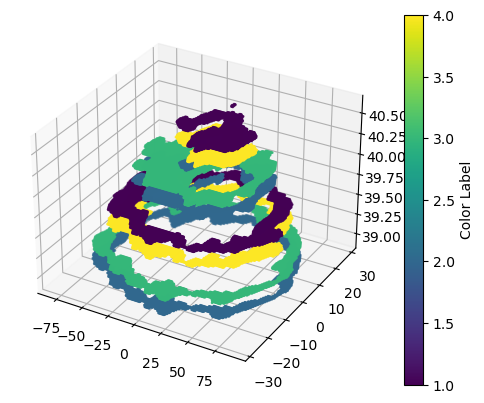

In [73]:
# Plot the facet in 3D

def plot_facet_3d(filepath):
    colour, x, y, z = read_XYZ(filepath)
    fig = plt.figure()  # Add parentheses here
    ax = fig.add_subplot(111, projection='3d')  # Correct 'subplot' to 'add_subplot'

    # Choose a colormap for coloring the points based on the 'colour' column
    colormap = plt.get_cmap("viridis")  # You can choose other colormaps as well

    # Normalize the 'colour' column to map it to the colormap
    norm = plt.Normalize(colour.min(), colour.max())

    # Scatter plot with colored points
    scatter = ax.scatter(x, y, z, c=colour, cmap=colormap, norm=norm, s=1)

    # Add a colorbar to show the color mapping
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Color Label")

    plt.show()

filepath = '/Users/user/Documents/PhD/AFML/PAR_ETH_100/20230809_154357/XYZ_files/PAR_ETH_100_1_ovito_CGvisualiser.XYZ'
plot_facet_3d(filepath)

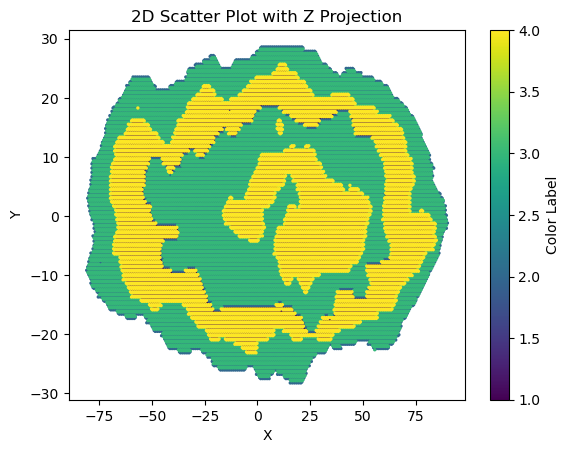

In [74]:
# Plot the facet in 2D

def plot_facet_2d(filepath):
    colour, x, y, z = read_XYZ(filepath)
    plt.figure()

    # Choose a colormap for coloring the points based on the 'colour' column
    colormap = plt.get_cmap("viridis")  # You can choose other colormaps as well

    # Normalize the 'colour' column to map it to the colormap
    norm = plt.Normalize(colour.min(), colour.max())

    # Scatter plot with colored points
    scatter = plt.scatter(x, y, c=colour, cmap=colormap, norm=norm, s=2)

    # Add a colorbar to show the color mapping
    cbar = plt.colorbar(scatter)
    cbar.set_label("Color Label")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("2D Scatter Plot with Z Projection")

    plt.show()

plot_facet_2d(filepath)

In [48]:
# Cut out a segment of xxx x yyy

In [49]:
# Plot segment in 3D

In [50]:
# Plot segment in 2D